<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Deep Learning 
</font>
<hr/>
<font color="#800080" size=5>
Assignment 1 : Introduction to Machine Learning
<br>
</font>
<font size=5>
Instructor: Dr. M. Bejani
<br>
</font>
<font size=4>
Spring 2025
<br>
</font>
<font face="Times New Roman" size=4>
Deadline: TBD
</font>
<hr>
<font color='red'  size=4>
Note: It is highly recommended to run your notebook on Google Colab or Kaggle
<br>
</font>
<font face="Times New Roman" size=4 align=center>
Feel free to ask your questions in Telegram : @amirhosseinjadidi
</font>
<br>
<hr>
</div></font>

In [1]:
Name = "MohammadParsa Dini"
StudentId = "400101204"

# Dimensionality Reduction (PCA)

The primary purpose of this exercise is to implement PCA from scratch and without prepared functions in sklearn.

Then we want to compare and analyze results after and before dimensionality reduction.

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import imutils
import torch

if torch.cuda.is_available():
    torch.device = 'cuda'
else :
    torch.device = 'cpu'

print(torch.device)

cuda


# Dataset

Brain Tumor dataset is attached to the notebook. It has two folders (yes and no).

'yes' folder contains MRI images of patients with Tumor and 'no' folder contains images of healthy people.

<font color='blue'  size=3>
Note: We wish no one would be in 'yes' folder in real life.


## Preprocess

In [2]:
### Cropping is a suggested tool for preprocessing this dataset

def crop_brain(image):

    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    # extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    return new_image

## Load data

In [3]:
import os
import time
from sklearn.utils import shuffle

start_time = time.time()
IMG_WIDTH, IMG_HEIGHT = (128,128)
DATASET_PATH = "C:\\Users\\USER\\Desktop\\DLHW01\\DLHW01\\BrainTumor"
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  load data (use cv2) then crop (use function above) and after that resize each image to (128,128) then change it to
#  one channel image (gray scale not RGB)
#  assign lablel 1 for patients with tumor and 0 otherwise
#####################################################################################
# TODO
def load_and_process_data(data_path):
    images = []
    labels = []
    classes = ["yes", "no"]
    for class_name in classes:
        class_path = os.path.join(data_path, class_name)
        print(class_path)
        for file_name in os.listdir(class_path):
            if file_name.endswith(("JPG",'jpg',"png","jpeg")):
                img_path = os.path.join(class_path ,file_name)
                img = cv2.imread(img_path)
                if img is not None:
                    try: 
                        cropped_img = crop_brain(img)
                    except:
                        cropped_img = img 
                        print(f'warning --- cropping failed for {file_name}')
                    gray_img = cv2.cvtColor(cropped_img, cv2.COLOR_RGB2GRAY)
                    resized_img = cv2.resize(gray_img, (IMG_WIDTH, IMG_HEIGHT))
                    # resized_img = resized_img.astype('float32') / 255.0
                    images.append(resized_img)
                    if class_name == "yes":
                        label = 1
                    else :
                        label=0
                    labels.append(label)
            else:
                print(file_name)
    return images, labels    


####################################################################################
#                                   THE END                                        #
####################################################################################

X, y = load_and_process_data(DATASET_PATH)
X = np.array(X)
y = np.array(y)
# X = X.reshape(X.shape[0], -1)
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  shuffle data (becareful about labels)
#####################################################################################
# TODO
X, y = shuffle(X, y, random_state=42)
####################################################################################
#                                   THE END                                        #
####################################################################################
end_time = time.time() 
print(f"Cell execution time: {end_time - start_time:.2f} seconds")

C:\Users\USER\Desktop\DLHW01\DLHW01\BrainTumor\yes
C:\Users\USER\Desktop\DLHW01\DLHW01\BrainTumor\no
Cell execution time: 0.81 seconds


In [4]:
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  show number of example and x , y size
#####################################################################################
# TODO
print("###############################")
print(f'Number of examples is {len(X)}')   # 253   
print(f"Image(X) shape: {X.shape}")        # (253, 128, 128)
print(f"Labels(y) shape: {y.shape}")       # (253,)    
print("###############################")

####################################################################################
#                                   THE END                                        #
####################################################################################

###############################
Number of examples is 253
Image(X) shape: (253, 128, 128)
Labels(y) shape: (253,)
###############################


In [5]:
print(f"Image(X) shape: {X.shape}") 
X = X.reshape(X.shape[0], -1)
print(f"Image(X) shape: {X.shape}") 

Image(X) shape: (253, 128, 128)
Image(X) shape: (253, 16384)


## Flatten

Reshape X so that each row represents one image or 128*128 pixels (2D data)

In [6]:
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  Reshape X to (number_of_example, number_of_all_pixels)
#####################################################################################
# TODO
number_of_examples = len(X)
number_of_all_pixels = IMG_HEIGHT * IMG_WIDTH
X = X.reshape(number_of_examples, number_of_all_pixels)

print(f'Reshaped X shape {X.shape}')      # (253, 16384)
####################################################################################
#                                   THE END                                        #
####################################################################################

Reshaped X shape (253, 16384)


## Split
In this section, split dataset to train and test and you can use splitting function from sklearn.

In [9]:

#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  Split data to train and test (testsize = 0.2)
#####################################################################################
# TODO
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}   ---  Testing set size: {X_test.shape}")
print(f"Training label size: {y_train.shape}       ---  Testing label size: {y_test.shape}")
####################################################################################
#                                   THE END                                        #
####################################################################################


Training set size: (202, 16384)   ---  Testing set size: (51, 16384)
Training label size: (202,)       ---  Testing label size: (51,)


# PCA

Implement PCA. Then use it to project the data to the latent space.  Note that you should implement the PCA, so using existing libraries is not allowed. you should use numpy to compute eigenvectors/eigenvalues or SVD of a matrix.

It is highly recommended to use svd function from linalg instead of eig or eigh.

## Fit function

In [11]:
def fit_PCA(X, n_components):
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean
    cov_mat = np.cov(X_centered, rowvar=False)
    eigenvals, eigenvecs = np.linalg.eigh(cov_mat)
    index = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[index]
    eigenvecs = eigenvecs[index]
    components = eigenvecs[:,:n_components]
    
    return components, X_mean 
    

We have 3 choices here:

*   Fit the model with X and apply the dimensionality reduction on X_train and X_test.
*   Fit the model with X_train and apply the dimensionality reduction on X_train and X_test.

*   Fit and apply the dimensionality reduction on X_train separately from  X_test.


Based on class lectures, choose of one these choices and explain why.

**** your answer ****
$\\$
The best choice is to fit the model with `X_train` and apply the dimensionality reduction on both `X_train` and `X_test`. This approach ensures that the principal components are determined only using the training data, avoiding any information leakage from the test set during training. Information leakage can artificially inflate the model's performance, as it incorporates patterns from the test set into the training process. By fitting PCA on `X_train` and transforming both datasets consistently, we maintain the integrity of the test set as an unseen dataset, aligned with best practices for model evaluation.

Fill the bottom cell according to your choice. We have set the reduced dimension = 20.

---



In [14]:
start_time = time.time()
n_components = 20
X_train_red = None
X_test_red = None
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  reduce the dimensions of X_train and X_test to 20
#####################################################################################
# TODO
components, mean = fit_PCA(X_train, n_components)
X_train_red = np.dot(X_train - mean, components)
X_test_red = np.dot(X_test - mean, components)


print(f'X_train shape: {X_train_red.shape}')  # (202, 20)
print(f'X_test shape: {X_test_red.shape}')    # (51, 20)
####################################################################################
#                                   THE END                                        #
####################################################################################
end_time = time.time() 
print(f"Cell execution time: {end_time - start_time:.2f} seconds")

X_train shape: (202, 20)
X_test shape: (51, 20)
Cell execution time: 306.04 seconds


# Reconstruction

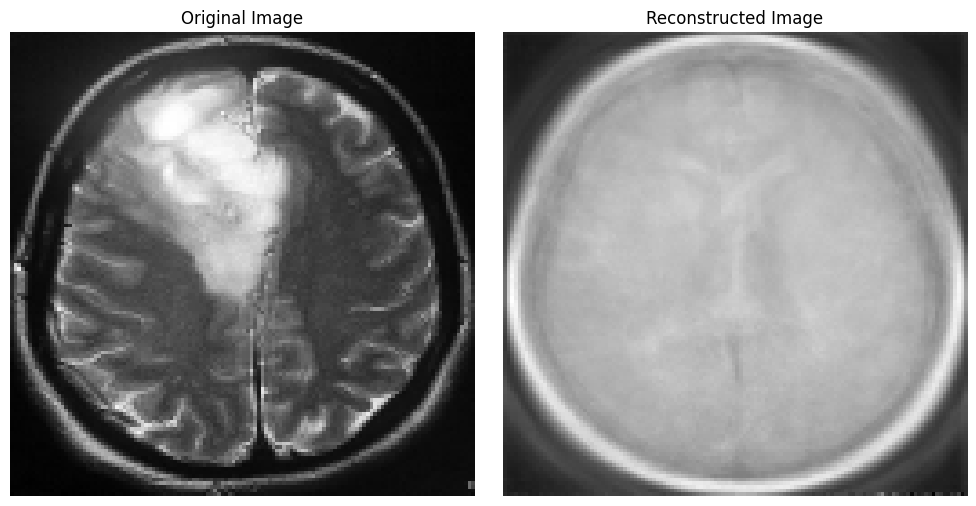

In [21]:
import matplotlib.pyplot as plt
import random
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  Reconstruct One random row of X_train and reshape to (128,128) and plot it
#  Then compare it to the original one
#  It is better to use gray cmap for images
#####################################################################################
# TODO

random_index = random.randint(0, X_train.shape[0] - 1)
original_image = X_train[random_index].reshape(IMG_HEIGHT, IMG_WIDTH)  

reconstructed_image = np.dot(X_train_red[random_index], components.T) + mean
reconstructed_image = reconstructed_image.reshape(IMG_HEIGHT, IMG_WIDTH)  # Reshape

# Plot the original and reconstructed images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

####################################################################################
#                                   THE END                                        #
####################################################################################


# Classifier

In this section use Support Vector Machine (SVM) for predicting Tumor from features.


Our purpose is comparing accuracy on test data before and after dimensionality reduction. Guess for yourself accuracy before and after PCA.

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model =  SVC(kernel='linear')

## Before dimensionality reduction

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

before_accuracy = None
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  Train model on X_train and report accuracy on X_test
#####################################################################################
# TODO
start_time = time.time()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
acc_before = accuracy_score(y_test, y_pred_test)
print(f'Accuracy before dimensionality reduction: {acc_before*100}')  #  0.7059
####################################################################################
#                                   THE END                                        #
####################################################################################
end_time = time.time() 
print(f"Cell execution time: {end_time - start_time:.2f} seconds")

Accuracy before dimensionality reduction: 74.50980392156863
Cell execution time: 0.53 seconds


## After dimensionality reduction

In [19]:
after_accuracy = None
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
#  Train model on X_train_red and report accuracy on X_test_red
#####################################################################################
# TODO
start_time = time.time()
model.fit(X_train_red, y_train)
y_pred_test = model.predict(X_test_red)
acc_after = accuracy_score(y_test, y_pred_test)
print(f'Accuracy after dimensionality reduction: {acc_after*100}')  # 0.6667
####################################################################################
#                                   THE END                                        #
####################################################################################
end_time = time.time() 
print(f"Cell execution time: {end_time - start_time:.2f} seconds")

Accuracy after dimensionality reduction: 62.745098039215684
Cell execution time: 4.79 seconds


When you get better accuracy?

 Can you explain why?

 Does unsupervised dimensionality reduction always increase accuracy?


**** your answer****

You achieve better accuracy when the dimensionality reduction effectively captures the most relevant features of the data, reducing noise and redundant information while preserving key patterns that help the model distinguish between classes. This can happen when the original data has high-dimensional, correlated features that introduce complexity without adding meaningful information. However, unsupervised dimensionality reduction, like PCA, does not always increase accuracy. Since it doesn't consider the labels, it may discard features that are critical for distinguishing between classes, leading to a loss of useful information. The impact of dimensionality reduction on accuracy depends on the dataset's structure and the relationship between features and labels.

<font  size=5>
GOOD LUCK